In [16]:
! pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 20.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 8.1 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 15.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

/Users/yujian/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/yujian/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  Referenced from: /Users/yujian/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /Users/yujian/.pyenv/versions/3.10.1/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [3]:
device = "cpu"
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, X):
        x = self.flatten(X)
        logits = self.linear_relu_stack(x)
        return logits

training_data = datasets.FashionMNIST(root="fashion_mnist", train=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root="fashion_mnist", train=False, transform=transforms.ToTensor())

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [4]:
model = NeuralNetwork()

In [5]:
learning_rate = 1e-3
batch_size=64
epochs=5

In [6]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # predictions
        pred = model(X)
        loss = loss_fn(pred, y)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"Current loss: {loss:>7f}, [{current:>5d}/{size:>5d}]")

In [8]:
def test_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")
    return 100*correct

In [9]:
plot_x = [] # epoch
plot_y = [] # accuracy

In [11]:
def optimize_loop(epoch_list, accuracy_list, epochs):
    for t in range(epochs):
        print(f"Epoch {t+1}\n")
        train_loop(train_dataloader, model, loss_fn, optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate))
        accuracy = test_loop(test_dataloader, model, loss_fn, optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate))
        plot_x.append(t)
        plot_y.append(accuracy)
    print("Done!")

In [12]:
import matplotlib
optimize_loop(plot_x, plot_y, 25)

Epoch 1

Current loss: 2.303854, [    0/60000]
Current loss: 2.289095, [ 6400/60000]
Current loss: 2.268932, [12800/60000]
Current loss: 2.270056, [19200/60000]
Current loss: 2.249601, [25600/60000]
Current loss: 2.230499, [32000/60000]
Current loss: 2.223814, [38400/60000]
Current loss: 2.200152, [44800/60000]
Current loss: 2.195068, [51200/60000]
Current loss: 2.162850, [57600/60000]
Test Error:
 Accuracy: 43.5%, Avg loss: 2.163084

Epoch 2

Current loss: 2.169900, [    0/60000]
Current loss: 2.159383, [ 6400/60000]
Current loss: 2.106048, [12800/60000]
Current loss: 2.129510, [19200/60000]
Current loss: 2.073186, [25600/60000]
Current loss: 2.019821, [32000/60000]
Current loss: 2.038338, [38400/60000]
Current loss: 1.967136, [44800/60000]
Current loss: 1.974856, [51200/60000]
Current loss: 1.898682, [57600/60000]
Test Error:
 Accuracy: 47.7%, Avg loss: 1.904098

Epoch 3

Current loss: 1.929328, [    0/60000]
Current loss: 1.904374, [ 6400/60000]
Current loss: 1.793816, [12800/60000]

In [13]:
import matplotlib.pyplot as plt

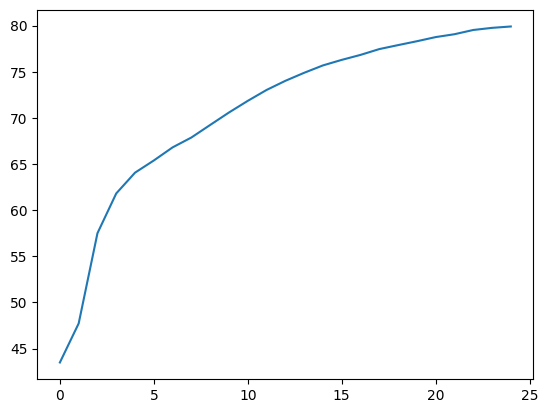

In [16]:
plt.plot(plot_x, plot_y)
plt.show()